# World data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

In [2]:
# Read the csv file
world_data_filepath = "C:/Users/Userpc/Desktop/Projects/Machine Learning/world-data-2023.csv"
world_data = pd.read_csv(world_data_filepath)
test_data = world_data.copy()
world_data.shape

(195, 35)

Spatial Distribution

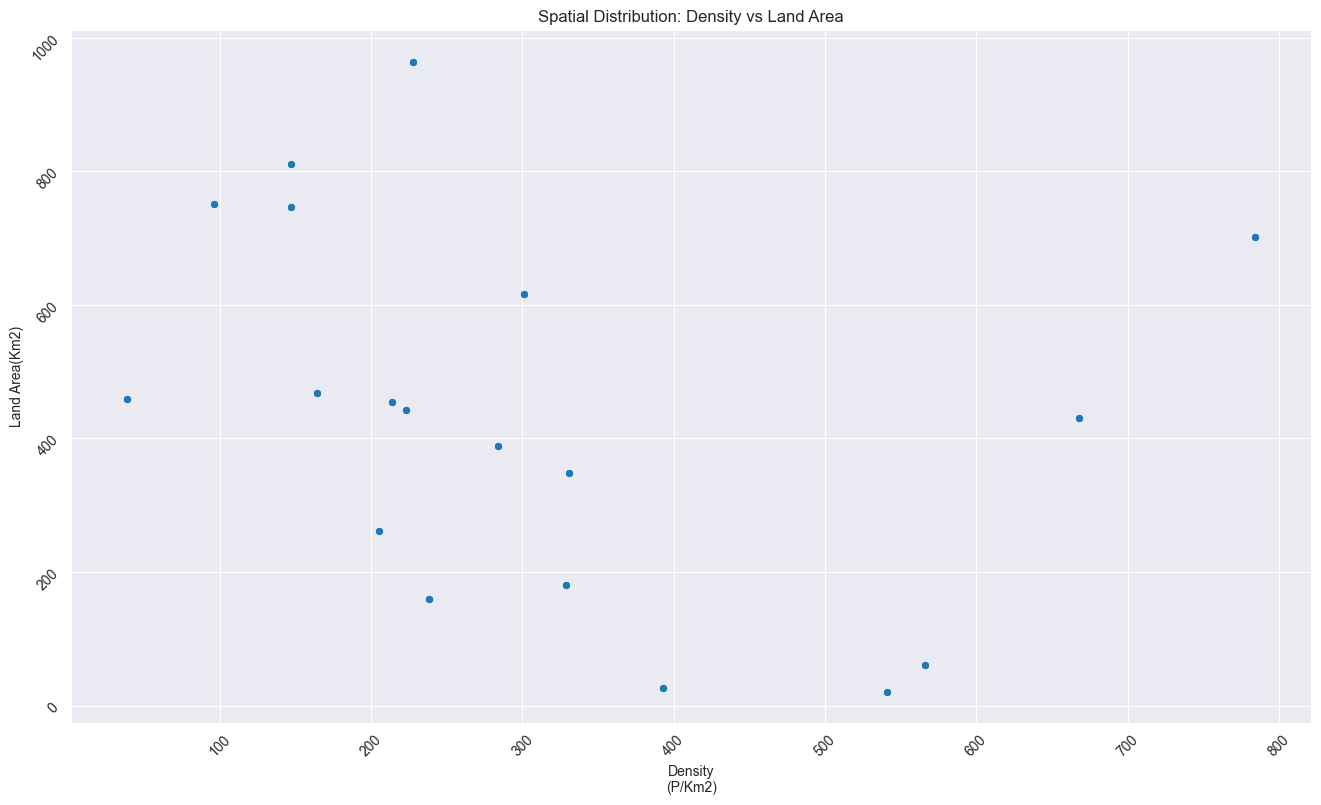

(195, 35)

In [3]:
# Drop missing values and transit the columns into numeric format
world_data_density = test_data.dropna(subset=["Density\n(P/Km2)", "Land Area(Km2)"])
world_data_density.loc[:, "Density\n(P/Km2)"] = pd.to_numeric(world_data_density.loc[:, "Density\n(P/Km2)"], errors='coerce')
world_data_density.loc[:, "Land Area(Km2)"] = pd.to_numeric(world_data_density.loc[:, "Land Area(Km2)"], errors='coerce')


# Seting the size of a figure
plt.figure(figsize=(16, 9))

# Creating scatterplot to study relationship between density and land are
sns.set_style('darkgrid')
sns.scatterplot(x=world_data_density.loc[:, "Density\n(P/Km2)"], y=world_data_density.loc[:, "Land Area(Km2)"])
plt.title("Spatial Distribution: Density vs Land Area")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()
test_data.shape

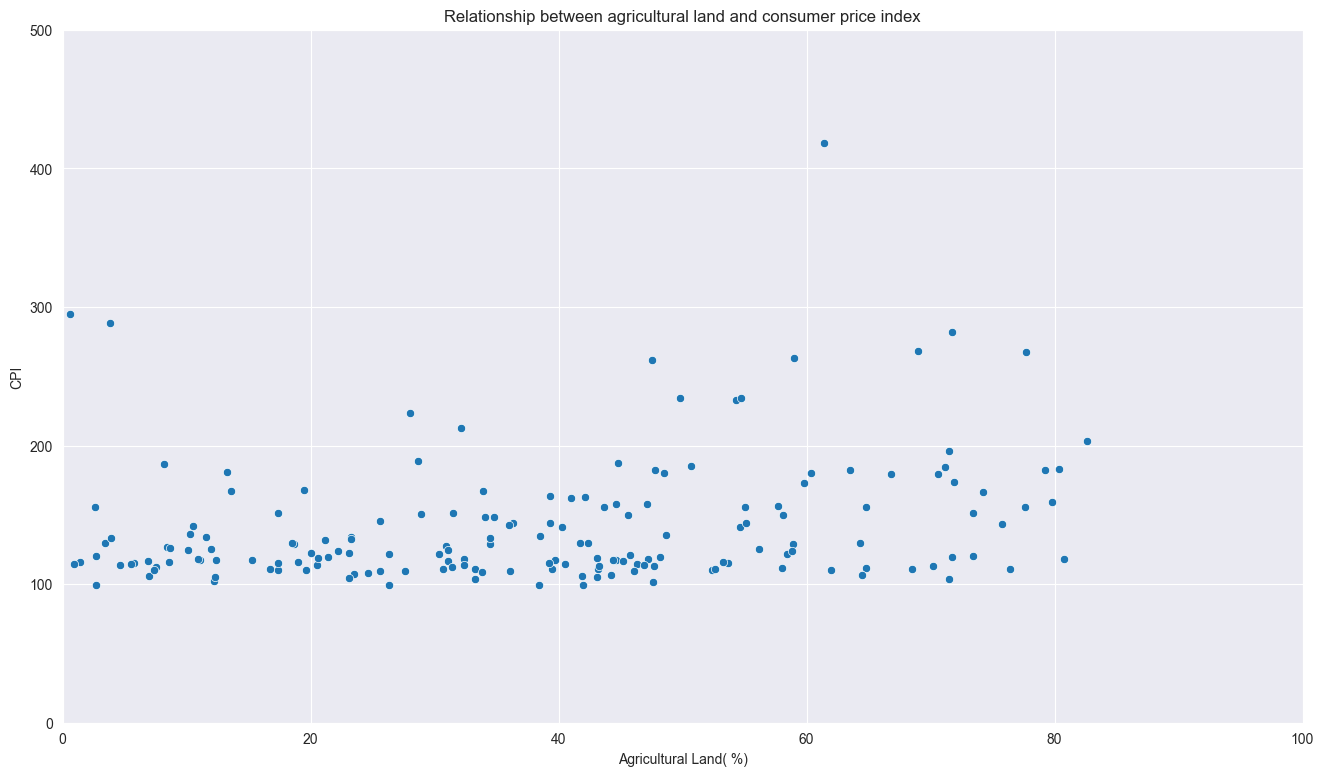

In [9]:
# Drop missing values
world_data_agriculture = test_data.dropna(subset=["Agricultural Land( %)", "CPI"])

# Replacing % to convert values in the column from strings into floats
world_data_agriculture.loc[:, "Agricultural Land( %)"] = world_data_agriculture.loc[:, "Agricultural Land( %)"].str.rstrip('%').astype('float')
# Replacing ',' to convert values in the column from strings into floats
world_data_agriculture.loc[:, "CPI"] = world_data_agriculture.loc[:, "CPI"].str.replace(',', '').astype('float')

# Creating scatterplot and jointplot to study the relationship

plt.figure(figsize=(16, 9))
sns.scatterplot(x=world_data_agriculture.loc[:, "Agricultural Land( %)"], y=world_data_agriculture.loc[:, "CPI"])
# sns.regplot(x=world_data_agriculture.loc[:, "Agricultural Land( %)"], y=world_data_agriculture.loc[:, "CPI"], data=world_data_agriculture)
# Set ranges for x and y axes
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.title("Relationship between agricultural land and consumer price index")

plt.show()

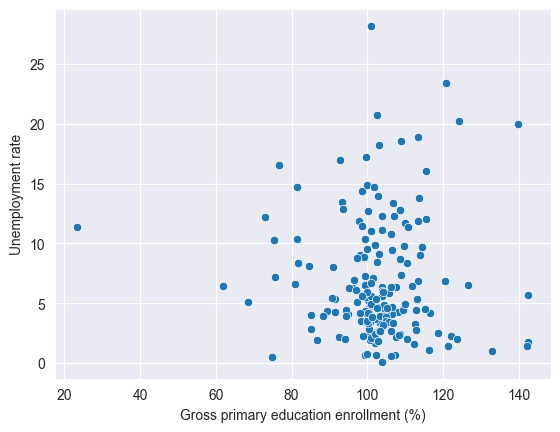

In [74]:
world_data_unemployment = test_data.dropna(subset=["Unemployment rate", "Gross primary education enrollment (%)"])
world_data_unemployment.loc[:, "Unemployment rate"] = world_data_unemployment.loc[:, "Unemployment rate"].str.strip('%').astype('float')
world_data_unemployment.loc[:, "Gross primary education enrollment (%)"] = world_data_unemployment.loc[:, "Gross primary education enrollment (%)"].str.rstrip("%").astype('float')

sns.scatterplot(x=world_data_unemployment.loc[:, "Gross primary education enrollment (%)"], y=world_data_unemployment.loc[:, "Unemployment rate"])
# sns.regplot(x=world_data_unemployment.loc[:, "Gross primary education enrollment (%)"], y=world_data_unemployment.loc[:, "Unemployment rate"])

plt.show()

In [29]:
print(test_data[["Infant mortality", "Life expectancy"]].dtypes)
print(test_data.loc[test_data.loc[:, "Infant mortality"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "Life expectancy"].isnull()].shape)

Infant mortality    float64
Life expectancy     float64
dtype: object
(6, 35)
(8, 35)


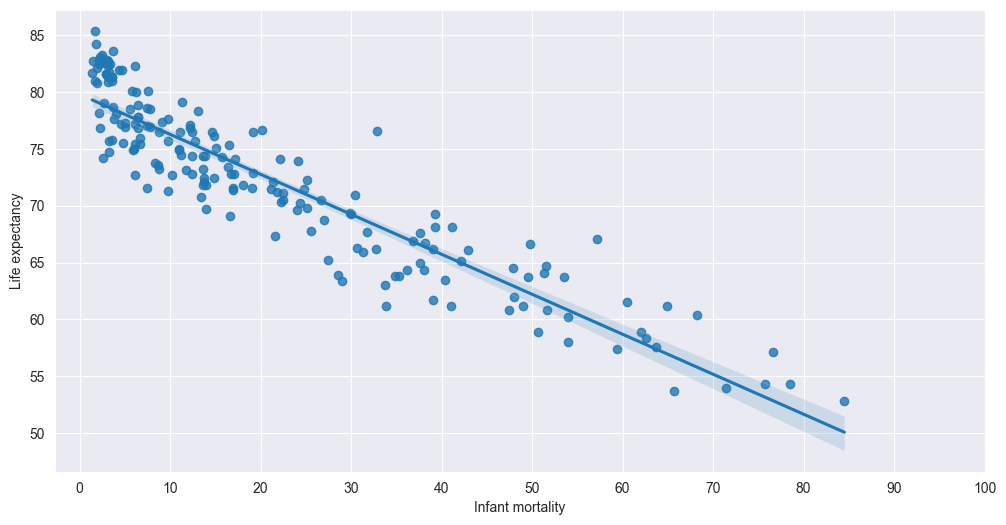

In [80]:
test_data.dropna(subset=["Infant mortality", "Life expectancy"])

plt.figure(figsize=(12, 6))
sns.regplot(x=test_data.loc[:, 'Infant mortality'], y=test_data.loc[:, "Life expectancy"])


plt.xticks(range(0, 101, 10))
plt.show()

In [67]:
print(test_data[["Population: Labor force participation (%)", "Unemployment rate"]].dtypes)
print(test_data.loc[test_data.loc[:, "Population: Labor force participation (%)"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "Unemployment rate"].isnull()].shape)

Population: Labor force participation (%)    object
Unemployment rate                            object
dtype: object
(19, 35)
(19, 35)


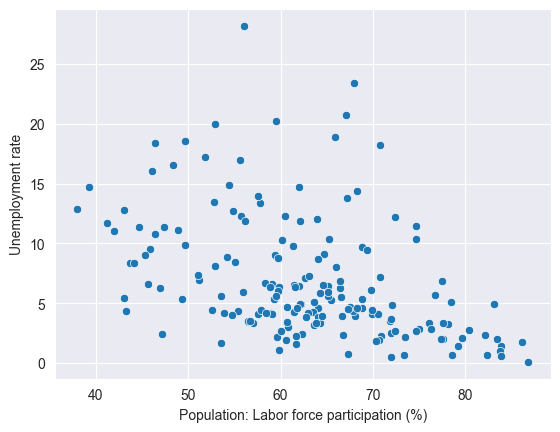

object
object
(176, 35)
Number of integers: 176
Number of objects: 0
Unique data types in the column: [<class 'float'>]


In [103]:
world_data_pop_unempl = test_data.dropna(subset=["Population: Labor force participation (%)", "Unemployment rate"])

world_data_pop_unempl.loc[:, "Population: Labor force participation (%)"] = world_data_pop_unempl.loc[:, "Population: Labor force participation (%)"].astype('str').str.rstrip('%').replace(',', '').astype('float')
world_data_pop_unempl.loc[:, "Unemployment rate"] = world_data_pop_unempl.loc[:, "Unemployment rate"].astype('str').str.rstrip('%').replace(',', '').astype('float')

sns.scatterplot(x=world_data_pop_unempl.loc[:, "Population: Labor force participation (%)"], y=world_data_pop_unempl.loc[:, "Unemployment rate"])

plt.show()

print(world_data_pop_unempl.loc[:, "Unemployment rate"].dtype)
print(world_data_pop_unempl.loc[:, "Population: Labor force participation (%)"].dtype)
# Count the number of integers in the column
num_integers = world_data_pop_unempl['Population: Labor force participation (%)'].apply(lambda x: isinstance(x, float)).sum()

# Count the number of objects (strings) in the column
num_objects = world_data_pop_unempl['Population: Labor force participation (%)'].apply(lambda x: isinstance(x, str)).sum()
data_types = world_data_pop_unempl['Population: Labor force participation (%)'].apply(lambda x: type(x)).unique()

print(world_data_pop_unempl.shape)
print("Number of integers:", num_integers)
print("Number of objects:", num_objects)

print("Unique data types in the column:", data_types)

In [113]:
print(test_data.loc[test_data.loc[:, "Total tax rate"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "GDP"].isnull()].shape)
test_data.loc[:, "Total tax rate"].head()

(12, 35)
(2, 35)


0    71.40%
1    36.60%
2    66.10%
3       NaN
4    49.10%
Name: Total tax rate, dtype: object

In [124]:
test_data.dropna(subset=["Total tax rate", "GDP"])

world_data_gdp = test_data.loc[:, "Total tax rate"].astype('str').str.rstrip('%').astype('float')
world_data_gdp = test_data.loc[:, "GDP"].astype('str').str.replace(',', '')
world_data_gdp = test_data.loc[:, "GDP"].str.strip('$').astype('int')

sns.scatterplot(x=world_data_gdp.loc[:, "GDP"], y=world_data_gdp.loc[:, "Total tax rate"])

ValueError: invalid literal for int() with base 10: '19,101,353,833 '